## Random number generators
Pseudo Random Number Generators have the structure:
$$
  s_0=\text{seed},\quad s_{i+1}=f(s_i,s_{i-1},\ldots)
$$


 An LCG generates the next element of the sequence $s_{i+1}$ solely
 based on the previous $s_i$:
 $$
   s_{i+1}=as_i+b\mod c
 $$
 often  $c=2^n$

A LRSR (linear recursive shift register) with feedback weights
$\vec b=(b_0,\ldots,b_k)$ and seed
$\vec s_0 = (s_0^0, s_1^0, \ldots, s_k^0)$ is defined by it's
register assignements at time $t+1$ according to:
$$
  s^{t+1}_{i+1}=s^t_i, \qquad i=0\ldots k-1, \qquad\qquad
  s^{t+1}_0=\bigoplus_{i=0}^k b_i s_i^t
$$


### 1. Implement LCG and LRSR PRNG's 
- Parameters of both LCG and LRSR should be choosable freely. 
- On optional parameter should define the number of numbers to be generated
- Implementation should either be a generator or return an array.
- Numbers generated should be from the range $[0,1)$

In [4]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def bin_to_register(a: int, register):
    a = str(bin(a))[2:]
    for i in range(register-len(a)):
        a = '0'+a
    return a

def in_interval(a: int, register):
    MAX_INT = 2**(register-1)
    return a/MAX_INT

In [6]:
def lcg(a=1103515245,b=12345,register=64 ,seed=12345,n=1):
    c=2**(register-1)
    vals=[]
    for i in range(n):
        si=(a*seed+b)%c
        seed=si
        val = in_interval(si, register)
        vals.append(val)   
    return np.array(vals)
   
    
def lrsr(b=999377432, seed=9875765234, n=1, register=64):
    vals = []
    for i in range(n):
        st = seed&b
        st = bin_to_register(st, register)
        s0 = int(st[0],2)
        for j in range(1,register):
            s0 = s0^int(st[j],2)
        seed =((2**(register-2))*(s0))+(seed>>1) 
        vals.append(in_interval(seed, register))
    return np.array(vals)

### Test Implementation

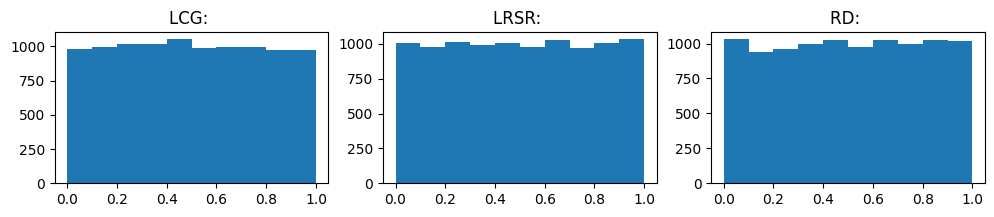

In [14]:
SAMPLE = 10000   #Iterations
x = 999377432    #LRSR weight
y = 9875765234   #LRSR seed
register_length = 64


plt.figure(figsize=(12, 2), dpi=100)
a = lcg(n=SAMPLE, register=register_length)
plt.subplot(131)
plt.title('LCG: ')
plt.hist(a)

b = lrsr(x,y,SAMPLE, register=register_length)
plt.subplot(132)
plt.title('LRSR: ')
plt.hist(b)

c = np.random.uniform(0.0,1.0,SAMPLE)
plt.subplot(133)
plt.title('RD: ')
plt.hist(c)
plt.show()

### 2. Evaluate Implemtation
- Try to find good and bad choices for the parameters of both generators
- Compute the autocorrelation of a generated sequence of length 1000 as a function of the lag and plot lag against autocorrelation
- Sample (as in the the example) for 10 ... 10000 times from your generator, create a histograms an show that the distribution in fact seems to be $U(0,1)$

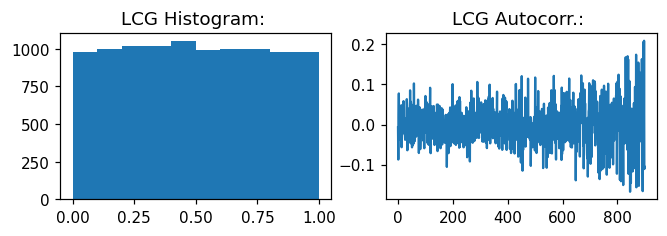

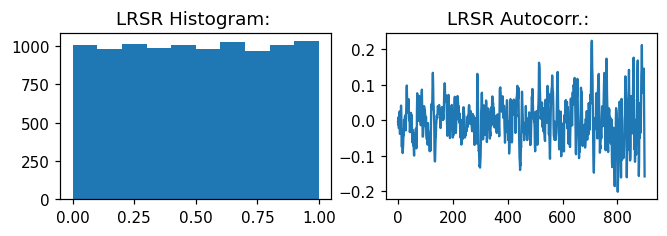

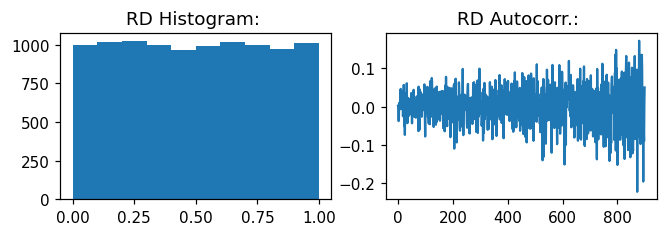

In [28]:
from numpy import corrcoef
import matplotlib.pyplot as plt

def autocorr(x,lags):
    corr=[1. if l==0 else corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

# --- implement here --- #
a = lcg(n=SAMPLE)
b = lrsr(x,y,SAMPLE)
c = np.random.uniform(0.0,1.0,SAMPLE)

tests = [('LCG', a),('LRSR', b),('RD', c)]


for test in tests:
    plt.figure(figsize=(7, 2), dpi=110)

    plt.subplot(121)
    plt.title(test[0] + ' Histogram: ')
    plt.hist(test[1])

    plt.subplot(122)
    plt.title(test[0] + ' Autocorr.: ')
    ac=autocorr(test[1], range(9000,10000-100))
    plt.plot(ac)
    
    plt.show()

### 3. Use PRNG to sample from given distribution
Below you see an implementation for the CDF of Poisson and Exponential distribution

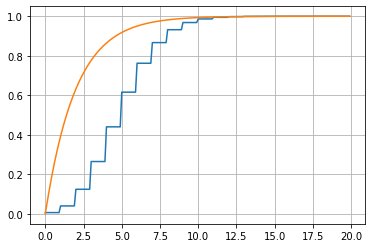

In [15]:
from numpy import arange
from math import exp, factorial, floor
import matplotlib.pyplot as plt

def poisson_cdf(l,k) :
    I=arange(0,floor(k)+1)
    return exp(-l)*sum( [l**i/factorial(i) for i in I] )

def exponential_cdf(l,x) :
    return 1-exp(-l*x)

K = arange(0,20,0.1)
Y = [poisson_cdf(5,k) for k in K]
plt.plot(K,Y)

K = arange(0,20,0.1)
Y = [exponential_cdf(0.5,k) for k in K]
plt.plot(K,Y)
plt.title('Cumulated Distribution Function Poisson und Exponentialverteilung')
plt.ylabel('Wahrscheinlichkeit')
plt.xlabel('k')
plt.grid(True)
plt.show()

- use your implementations of PRNG's to create "samplers" for these two distributions
- create 10 ... 10000 samples (for $\lambda=5$ (Poisson) and $\lambda=0.5$ (Exponential) ) and create histograms for the frequencies for each

In [38]:
from scipy.stats import *

# --- implement here --- #
def poisson_sample(prng, n):
    rets = []
    p = prng
    for i in range(n):
        rets.append(poisson.ppf(p[i], 5, loc=0))
    return rets


    
def exponential_sample(prng, n):
    rets = []
    p = prng
    for i in range(n):
        rets.append(expon.ppf(p[i]))
    return rets

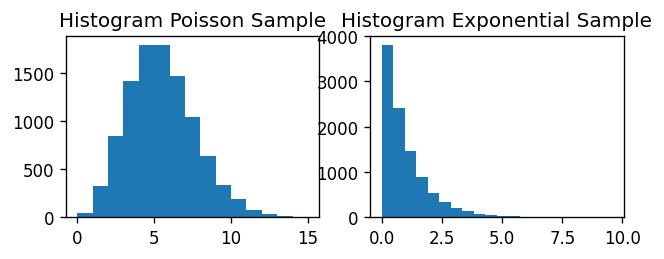

In [41]:
SAMPLE = 10000   #Iterations

plt.figure(figsize=(6, 2), dpi=120)

plt.subplot(121)
plt.title('Histogram Poisson Sample')
rets = poisson_sample(lcg(n=SAMPLE),SAMPLE)
plt.hist(rets, bins = 15)

plt.subplot(122)
plt.title('Histogram Exponential Sample')
rets = exponential_sample(lcg(n=SAMPLE),SAMPLE)
plt.hist(rets, bins = 20)
plt.show()